In [234]:
#Basic packages for data cleaning and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

#Pakages for modelling
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [235]:
pd.options.display.max_columns = None          # To display all the columns
pd.options.display.max_rows = None             # To display all the rows

#Reading the data
car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [236]:
#To drop car_ID from data set
car_df.drop(labels = ['car_ID'], axis = 1, inplace = True)

In [237]:
#To check the shape and info of data set
print(car_df.shape)
print(car_df.info())

(205, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
cit

In [238]:
#Create a new column to extract car company name
car_df['CompanyName'] = cars_df['CarName'].str.split().str[0]
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [239]:
#To check the unique values in car brand
car_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [240]:
#To drop car name 
car_df.drop('CarName', axis = 1, inplace = True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [241]:
#As there are company names which are same but with different spellings and some with abbreviations, 
#replacing company names with correct names.

car_df['CompanyName'] = car_df['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
car_df['CompanyName'] = car_df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
car_df['CompanyName'] = car_df['CompanyName'].replace(['Nissan'], 'nissan')
car_df['CompanyName'] = car_df['CompanyName'].replace(['porcshce'], 'porsche')
car_df['CompanyName'] = car_df['CompanyName'].replace(['toyouta'], 'toyota')
car_df['CompanyName'] = car_df['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

car_df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Data Understanding

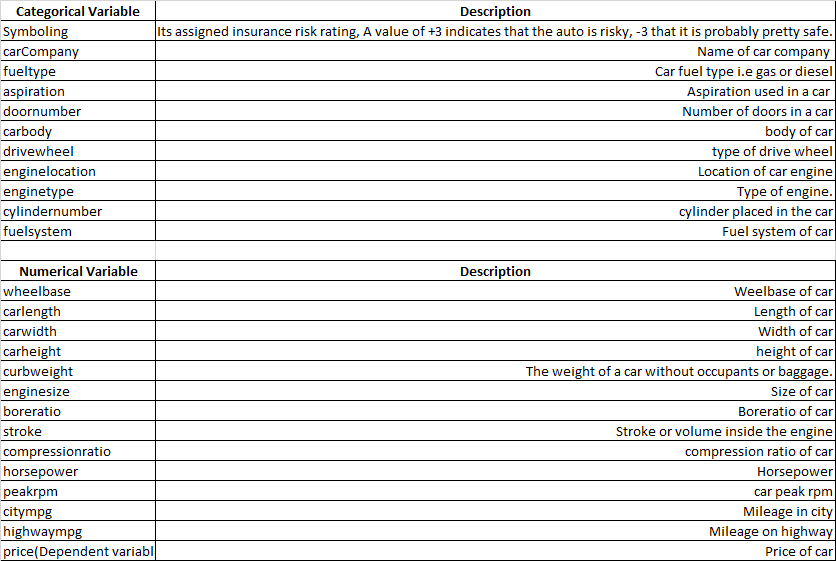

In [242]:
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


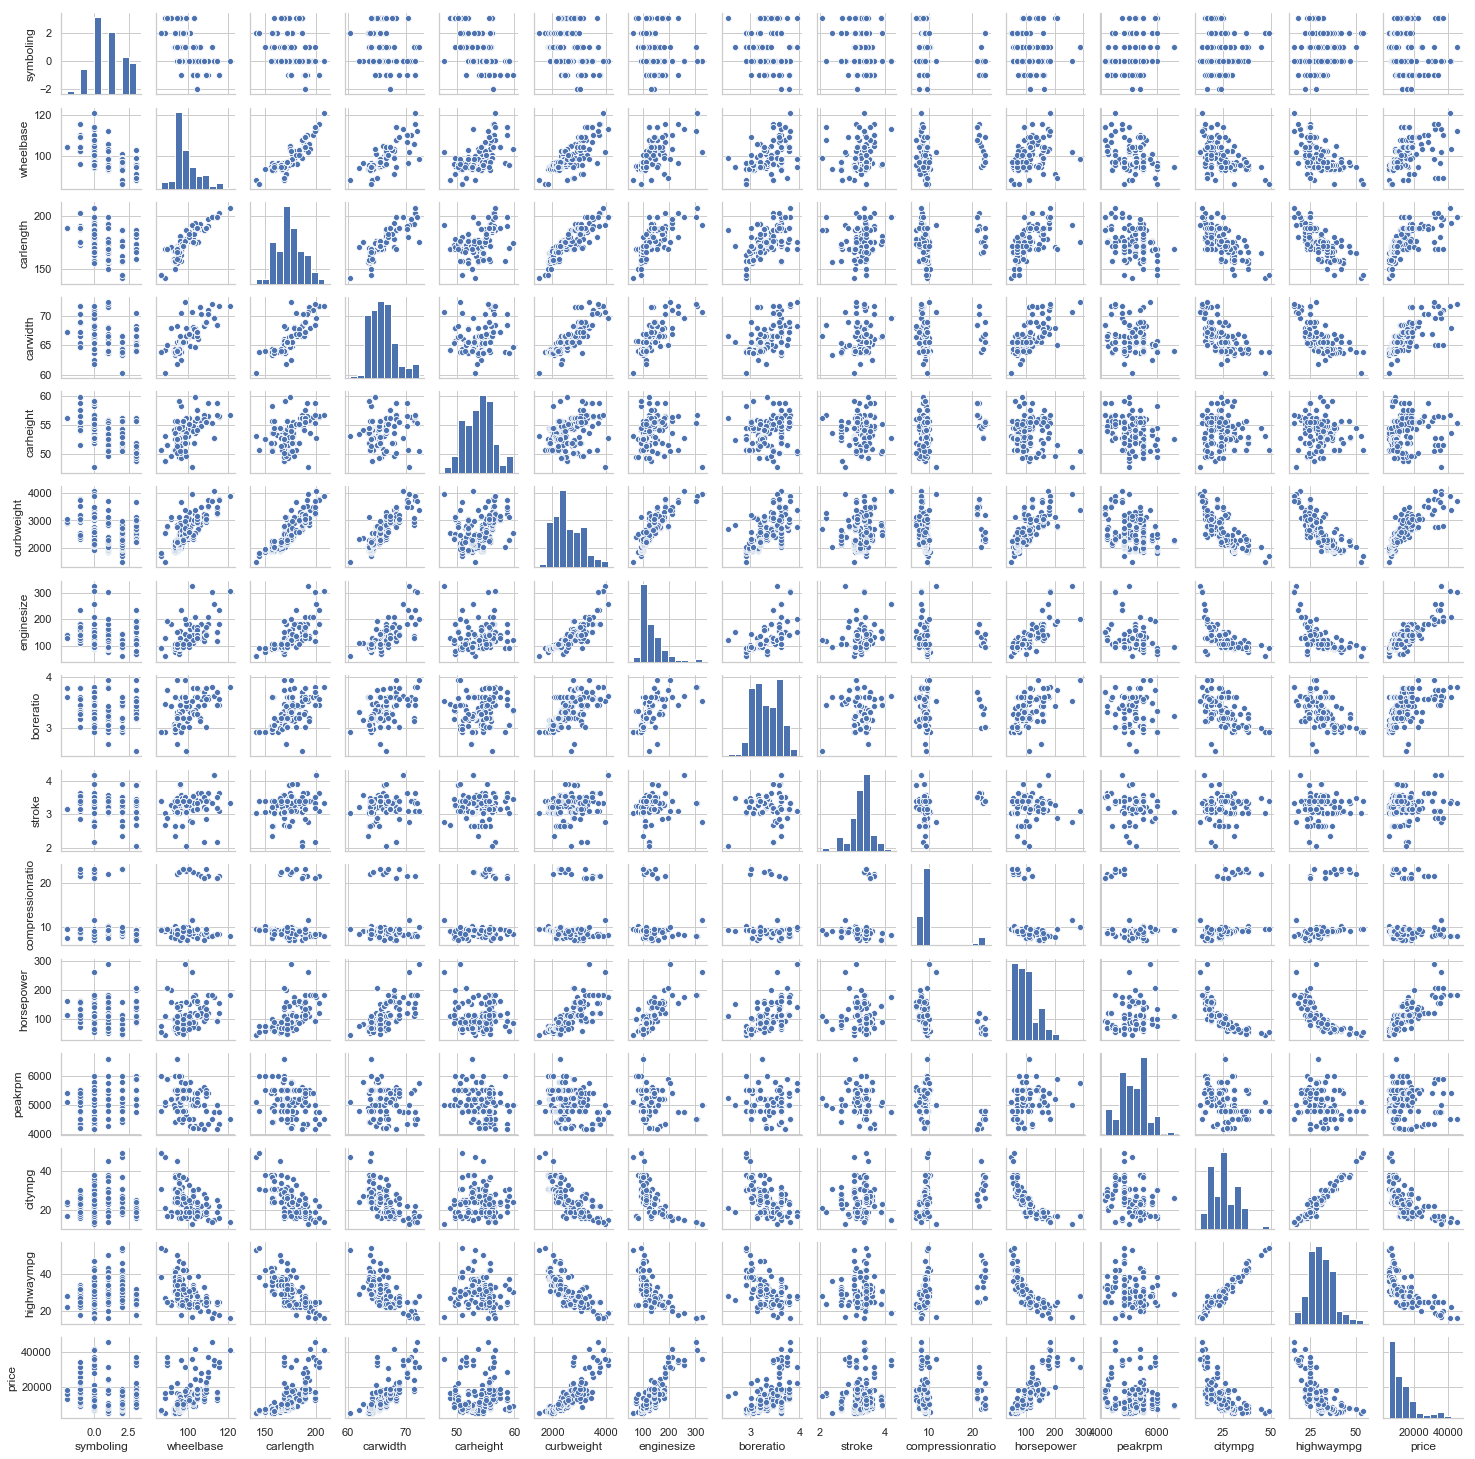

In [243]:
#Visualising Numeric Variables
pairplot = sns.pairplot(car_df)
pairplot.fig.set_size_inches(20,20)
plt.show()

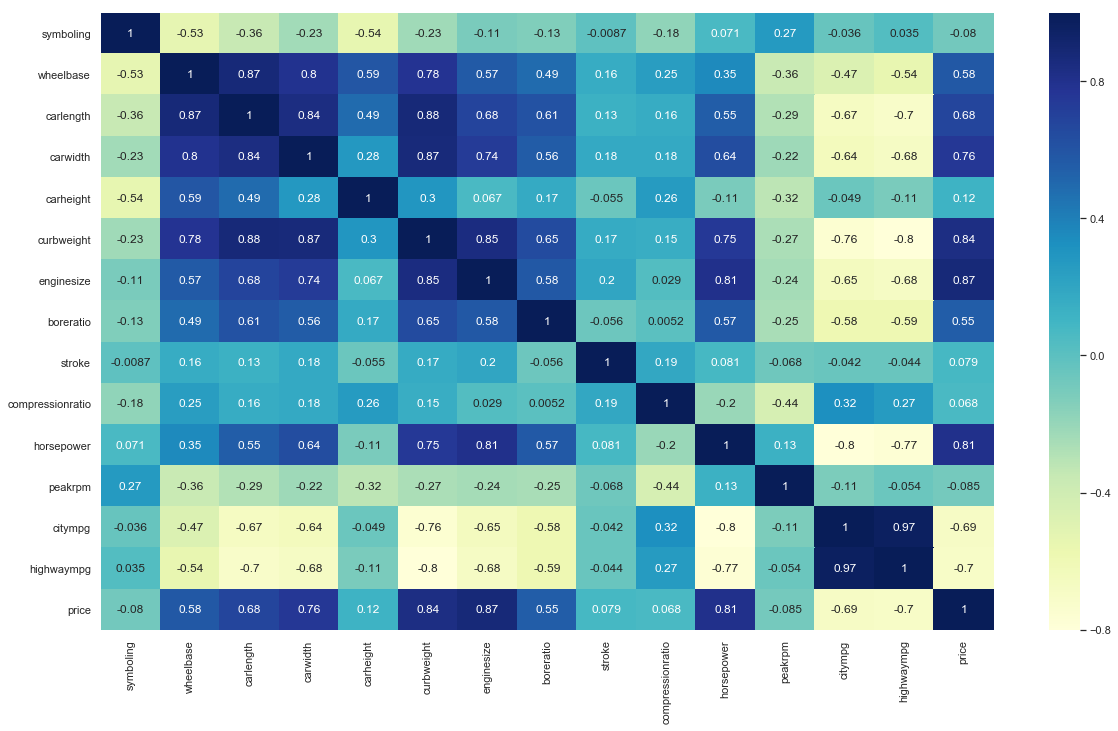

In [244]:
#Checking corelation
plt.figure(figsize = (20, 25))
plt.subplot(2, 1, 1)
sns.heatmap(car_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

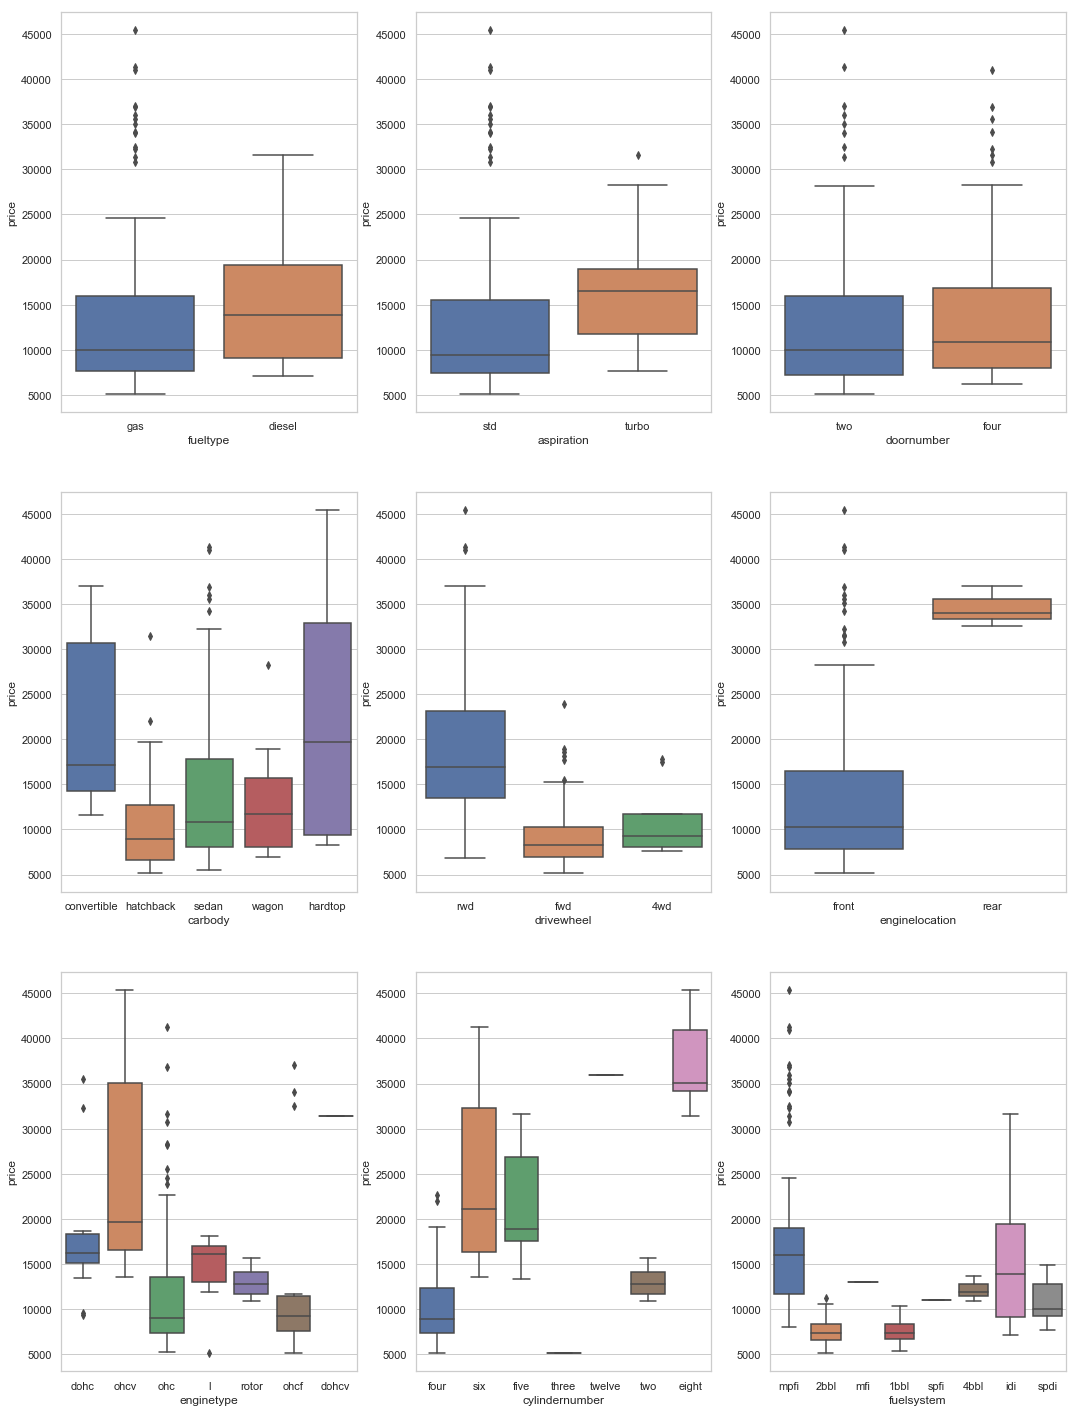

In [245]:
# Relation of categorical variable with car price

plt.figure(figsize=(18, 25))

#fueltype
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = car_df)

#aspiration
plt.subplot(3,3,2)
sns.boxplot(x='aspiration', y = 'price', data = car_df)

#doornumber
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)

#carbody
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)

#drivewheel
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)

#enginelocation
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)

#enginetype
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)

#cylindernumber
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)

#fuelsystem
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)

plt.show()

In [246]:
#Compare company name vs Price w.r.t median 
print(car_df.groupby(by='CompanyName').price.median().sort_values(ascending=False))

CompanyName
jaguar        35550.0
buick         32892.0
porsche       32528.0
bmw           22835.0
volvo         18420.0
audi          17710.0
peugeot       16630.0
mercury       16503.0
alfa-romeo    16500.0
saab          15275.0
mazda         10595.0
volkswagen     9737.5
renault        9595.0
toyota         9103.0
isuzu          8916.5
mitsubishi     8499.0
nissan         8124.0
subaru         7894.0
plymouth       7609.0
dodge          7609.0
honda          7295.0
chevrolet      6295.0
Name: price, dtype: float64


D:\Anaconda_Setup\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


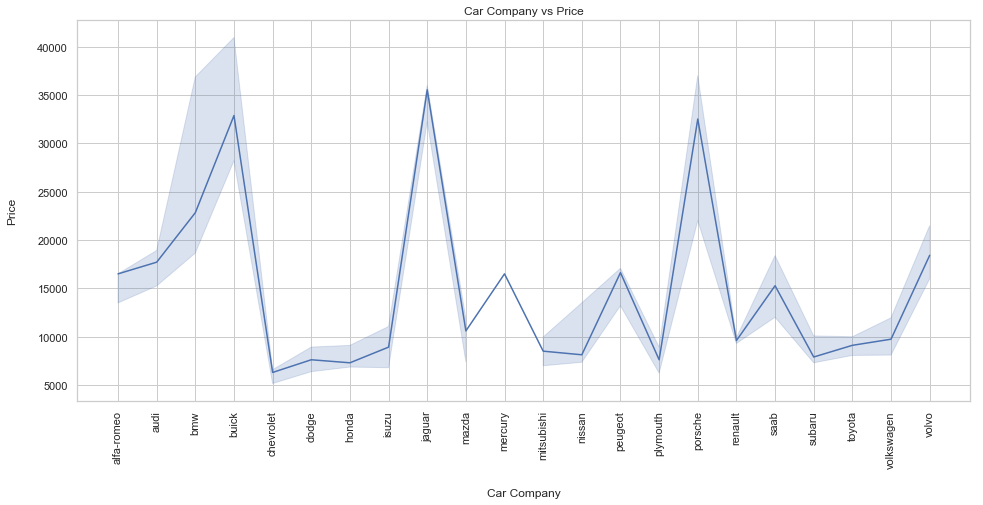

In [249]:
#company name vs price

plt.figure(figsize=(16, 7))
sns.set(style = "whitegrid")   #To get the grid in graph

sns.lineplot(x='CompanyName', y='price', data=car_df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Car Company vs Price')
plt.xlabel('Car Company', labelpad = 20)
plt.ylabel('Price', labelpad = 20)

plt.show()

In [180]:
print("fueltype")
print(cars_df['fueltype'].unique())

print("aspiration")
print(cars_df['aspiration'].unique())

print("doornumber")
print(cars_df['doornumber'].unique())

print("carbody")
print(cars_df['carbody'].unique())

print("drivewheel")
print(cars_df['drivewheel'].unique())

print("enginelocation")
print(cars_df['enginelocation'].unique())

print("enginetype")
print(cars_df['enginetype'].unique())

print("cylindernumber")
print(cars_df['cylindernumber'].unique())

print("fuelsystem")
print(cars_df['fuelsystem'].unique())

fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [181]:
#Categorical Variable : fueltype, aspiration, doornumber, enginelocation - 2 level
#Categorical Variable : drivewheel - 3 levels
#Categorical Variable : carbody - 5 levels
#Categorical Variable : enginetype, cylindernumber - 7 levels
#Categorical Variable : fuelsystem - 8 levels

#Applying 0 and 1 values for categorical variable with 2 level
car_df['fueltype'] = car_df['fueltype'].map({'diesel':0, 'gas':1})
car_df['aspiration'] = car_df['aspiration'].map({'turbo':0, 'std':1})
car_df['doornumber'] = car_df['doornumber'].map({'two':0, 'four':1})
car_df['enginelocation'] = car_df['enginelocation'].map({'rear':0, 'front':1})

In [182]:
# Applying dummy variables to drivewheel, carbody, enginetype, cylindernumber, fuelsystem columns which have more than 2 levels
car_df = pd.get_dummies(car_df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [183]:
#Dropping the variables least releated with price as per the boxplot above.

#drivewheel_4wd has the least effect on the price
#carbody_hatchback has the least effect on the price
#enginetype_rotor has the least effect on the price
#cylindernumber_three has the least effect on the price
#fuelsystem_1bbl has the least effect on the price

car_df.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)
car_df.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)
car_df.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)
car_df.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)
car_df.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)

print(car_df.columns)
print(car_df.shape)

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_convertible',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
(205, 45)


In [184]:
car_df_category = car_df.groupby(['CompanyName']).median()
car_df_category['price']

CompanyName
alfa-romeo    16500.0
audi          17710.0
bmw           22835.0
buick         32892.0
chevrolet      6295.0
dodge          7609.0
honda          7295.0
isuzu          8916.5
jaguar        35550.0
mazda         10595.0
mercury       16503.0
mitsubishi     8499.0
nissan         8124.0
peugeot       16630.0
plymouth       7609.0
porsche       32528.0
renault        9595.0
saab          15275.0
subaru         7894.0
toyota         9103.0
volkswagen     9737.5
volvo         18420.0
Name: price, dtype: float64

In [185]:
CarLabels = ['BudgetCars', 'MidlevelCars', 'LuxuriousCars']
bins = [0, 10000, 20000, 50000]

car_df_category = car_df_category[['price']].join(pd.get_dummies(pd.cut(car_df_category.price, bins, labels=CarLabels)))
car_df_category

,price,BudgetCars,MidlevelCars,LuxuriousCars
CompanyName,,,,
alfa-romeo,16500.0,0,1,0
audi,17710.0,0,1,0
bmw,22835.0,0,0,1
buick,32892.0,0,0,1
chevrolet,6295.0,1,0,0
dodge,7609.0,1,0,0
honda,7295.0,1,0,0
isuzu,8916.5,1,0,0
jaguar,35550.0,0,0,1


In [186]:
#Creating dummy variables for carlabels
LuxuriousCars = ['bmw', 'buick', 'jaguar', 'porsche']


def LuxuriousCars_Category(carCompanies):
    val = 0
    if carCompanies in LuxuriousCars:
        val = 1
    else:
        val = 0
        
    return int(val)


car_df['LuxuriousCars'] = 0
car_df['LuxuriousCars'] = car_df['CompanyName'].apply(LuxuriousCars_Category)

In [187]:
MidlevelCars = ['alfa-romeo', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def MidlevelCars_Category(carCompanies1):
    retval = 0
    if carCompanies1 in MidlevelCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

car_df['MidlevelCars'] = 0
car_df['MidlevelCars'] = car_df['CompanyName'].apply(MidlevelCars_Category) 

# Lets look at the dataframe again
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuriousCars,MidlevelCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [188]:
#As we have created dummy variables for company names lets drop CompanyName vriable
car_df.drop(labels=['CompanyName'], axis = 1, inplace=True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuriousCars,MidlevelCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [189]:
#Creating dummy variable for symboling

SymbolingLabels = ['Low', 'Moderate', 'High']
bins = [-3, -2, 2, 3]

car_df = car_df.join(pd.get_dummies(pd.cut(car_df['symboling'], bins, labels=SymbolingLabels)))
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuriousCars,MidlevelCars,Low,Moderate,High
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [190]:
#Dropping symboling and dummy variable High
car_df.drop(labels=['High'], axis = 1, inplace = True)
car_df.drop(labels=['symboling'], axis = 1, inplace = True)
car_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuriousCars,MidlevelCars,Low,Moderate
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
#From heatmap we find following observations:
#carlength is highly correlated with carwidth. (corr = 0.84)
#carlength is highly correlated with wheelbase. (corr = 0.87)
#carwidth is highly correlated with crubweight. (corr = 0.87)
#crubweight is highly correlated with horsepower. (corr = 0.75)
#horsepower is highly correlated with enginesize. (corr = 0.81)
#highwaympg is highly correlated with citympg. (corr = 0.97)

#We can drop carwidth, carlength, highwaympg, citympg

#The reason for dropping 'carwidth', 'carlength' is that these two variables are strongly correlated to 'curbweight'.
#The reason for dropping 'highwaympg', 'citympg' is that they both are very highly correlated to each other

In [191]:
car_df.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)
car_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuriousCars,MidlevelCars,Low,Moderate
0,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [192]:
#Split the data into Train and Test sets

np.random.seed(0)
#Divideing the data into 70/30 % to train and test data respectively.
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [193]:
# Scalling columns except the 'yes-no' and 'dummy' variables
#wheelbase, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, curbweight, price

scaler = MinMaxScaler()

numerical_var = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke','compressionratio', 
            'peakrpm', 'price']

df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

D:\Anaconda_Setup\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda_Setup\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [194]:
y_train = df_train.pop('price')
X_train = df_train

In [195]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 15 output variables.
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [196]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 9),
 ('aspiration', False, 11),
 ('doornumber', False, 25),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 18),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 26),
 ('enginetype_dohc', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 12),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 22),
 ('fuelsystem_2bbl', False, 24),
 ('fuelsystem_4bbl', Fal

In [197]:
#Variables that RFE supports 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'LuxuriousCars'],
      dtype='object')

In [198]:
#variables that RFE rejects 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'peakrpm',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'MidlevelCars', 'Low',
       'Moderate'],
      dtype='object')

In [199]:
#Creating Custom variables for statmodel and vif

#StatModels
def StatModels(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)
    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model

#VIFs
def VIFs(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Model 1

In [200]:
#create a data set only with RFE supported columns.
X_train_1 = X_train[col]

# Run the linear model
model_1 = StatModels(X_train_1)

#Let's see the summary of the linear model built above
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.95e-67
Time:                        00:13:52   Log-Likelihood:                 210.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     127   BIC:                            -341.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [201]:
# Calculate the VIFs for the model
vif_1 = VIFs(X_train_1)
vif_1

,Features,VIF
2,curbweight,70.75
3,enginesize,66.63
0,enginelocation,41.82
5,stroke,30.20
7,horsepower,26.77
1,wheelbase,25.98
4,boreratio,25.92
11,cylindernumber_four,11.38
12,cylindernumber_six,5.97
13,cylindernumber_twelve,4.24


#### Result Model 1
From model 1,  variable <b>cylindernumber_eight</b> has a high p-value <b>0.648</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 2

In [202]:
X_train_2 = X_train_1.drop(["cylindernumber_eight"], axis = 1)

# Run the linear model
model_2 = StatModels(X_train_2)

#Let's see the summary of the new linear model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.73e-68
Time:                        00:14:00   Log-Likelihood:                 210.35
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     128   BIC:                            -346.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [203]:
# Calculate the VIFs for the model
vif_2 = VIFs(X_train_2)
vif_2

,Features,VIF
2,curbweight,70.30
3,enginesize,44.73
0,enginelocation,35.12
7,horsepower,26.75
1,wheelbase,25.90
5,stroke,23.93
4,boreratio,20.88
10,cylindernumber_four,11.11
11,cylindernumber_six,3.83
12,cylindernumber_twelve,2.94


####  Result Model 2
From model 2, variable <b>enginesize</b> has a high p-value <b>0.362</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 3

In [204]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Run the linear model
model_3 = StatModels(X_train_3)

#Let's see the summary of the new linear model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.23e-69
Time:                        00:14:08   Log-Likelihood:                 209.88
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     129   BIC:                            -350.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [205]:
# Calculate the VIFs for the model
vif_3 = VIFs(X_train_3)
vif_3

,Features,VIF
2,curbweight,60.37
0,enginelocation,31.31
6,horsepower,26.69
1,wheelbase,25.81
3,boreratio,19.06
4,stroke,18.99
9,cylindernumber_four,11.01
5,compressionratio,2.80
10,cylindernumber_six,2.71
12,LuxuriousCars,2.00


####  Result Model 3
From model 3, variable <b>stroke</b> has a high p-value <b>0.546</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 4 

In [206]:
X_train_4 = X_train_3.drop(["stroke"], axis = 1)

# Run the linear model
model_4 = StatModels(X_train_4)

#Let's see the summary of the new linear model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.93e-70
Time:                        00:14:16   Log-Likelihood:                 209.68
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     130   BIC:                            -354.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [207]:
vif_4 = VIFs(X_train_4)
vif_4

,Features,VIF
2,curbweight,59.71
1,wheelbase,25.77
5,horsepower,24.11
0,enginelocation,20.29
3,boreratio,15.40
8,cylindernumber_four,10.53
9,cylindernumber_six,2.67
4,compressionratio,2.54
11,LuxuriousCars,1.97
7,enginetype_dohcv,1.75


####  Result Model 4
From model 4, variable <b>boreratio</b> has a high p-value <b>0.504</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 5

In [208]:
X_train_5 = X_train_4.drop(["boreratio"], axis = 1)

# Run the linear model
model_5 = StatModels(X_train_5)

#Let's see the summary of the new linear model
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.59e-71
Time:                        00:14:22   Log-Likelihood:                 209.43
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     131   BIC:                            -359.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [209]:
vif_5 = VIFs(X_train_5)
vif_5

,Features,VIF
2,curbweight,56.65
1,wheelbase,25.76
4,horsepower,22.34
0,enginelocation,20.17
7,cylindernumber_four,8.52
8,cylindernumber_six,2.61
3,compressionratio,2.53
10,LuxuriousCars,1.93
6,enginetype_dohcv,1.75
9,cylindernumber_twelve,1.43


#### Result Model 5
From model 5, variable <b>cylindernumber_twelve</b> has a high p-value <b>0.267</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 6

In [210]:
X_train_6 = X_train_5.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
model_6 = StatModels(X_train_6)

#Let's see the summary of the new linear model
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.85e-72
Time:                        00:14:29   Log-Likelihood:                 208.76
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     132   BIC:                            -362.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1657    

In [211]:
vif_6 = VIFs(X_train_6)
vif_6

,Features,VIF
2,curbweight,56.25
1,wheelbase,25.61
0,enginelocation,20.13
4,horsepower,19.34
7,cylindernumber_four,8.49
3,compressionratio,2.44
8,cylindernumber_six,2.27
9,LuxuriousCars,1.89
6,enginetype_dohcv,1.55
5,carbody_convertible,1.35


#### Result Model 6
From model 6, variable <b>cylindernumber_six</b> has a high p-value <b>0.185</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 7 

In [212]:
X_train_7 = X_train_6.drop(["cylindernumber_six"], axis = 1)

# Run the linear model
model_7 = StatModels(X_train_7)

#Let's see the summary of the new linear model
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.47e-72
Time:                        00:14:35   Log-Likelihood:                 207.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1480    

In [213]:
vif_7 = VIFs(X_train_7)
vif_7

,Features,VIF
2,curbweight,56.00
1,wheelbase,25.58
0,enginelocation,19.08
4,horsepower,18.11
7,cylindernumber_four,6.97
3,compressionratio,2.44
8,LuxuriousCars,1.89
6,enginetype_dohcv,1.41
5,carbody_convertible,1.34


#### Result Model 7
From model 7, variable <b>enginetype_dohcv</b> has a high p-value <b>0.055</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 8

In [214]:
X_train_8 = X_train_7.drop(["enginetype_dohcv"], axis = 1)

# Run the linear model
model_8 = StatModels(X_train_8)

#Let's see the summary of the new linear model
print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.04e-73
Time:                        00:14:42   Log-Likelihood:                 205.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1864    

In [215]:
vif_8 = VIFs(X_train_8)
vif_8

,Features,VIF
2,curbweight,50.88
1,wheelbase,25.29
0,enginelocation,18.86
4,horsepower,14.11
6,cylindernumber_four,6.91
3,compressionratio,2.31
7,LuxuriousCars,1.87
5,carbody_convertible,1.34


#### Result Model 8
From model 8, variable <b>compressionratio</b> has a high p-value <b>0.057</b> and thus is insignificant to model dropping & build a new model with the remaining variables.

# Model 9

In [216]:
X_train_9 = X_train_8.drop(["compressionratio"], axis = 1)

# Run the linear model
model_9 = StatModels(X_train_9)

#Let's see the summary of the new linear model
print(model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     244.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.29e-73
Time:                        00:14:49   Log-Likelihood:                 203.87
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     135   BIC:                            -368.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2084    

In [217]:
vif_9 = VIFs(X_train_9)
vif_9

,Features,VIF
2,curbweight,46.00
1,wheelbase,25.24
0,enginelocation,18.67
3,horsepower,11.60
5,cylindernumber_four,6.91
6,LuxuriousCars,1.86
4,carbody_convertible,1.33


#### Result Model 9
From model 9, all p-values are in ranges hence as per VIF <b>curbweight</b> has highest value of <b>46</b> dropping & build a new model with the remaining variables.

# Model 10

In [218]:
X_train_10 = X_train_9.drop(["curbweight"], axis = 1)

# Run the linear model
model_10 = StatModels(X_train_10)

#Let's see the summary of the new linear model
print(model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     262.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.56e-72
Time:                        00:14:55   Log-Likelihood:                 197.95
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     136   BIC:                            -361.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2095    

In [219]:
vif_10 = VIFs(X_train_10)
vif_10

,Features,VIF
0,enginelocation,18.61
1,wheelbase,7.13
4,cylindernumber_four,6.86
2,horsepower,5.35
5,LuxuriousCars,1.84
3,carbody_convertible,1.11


#### Result Model 10
From model 10, all p-values are in ranges hence as per VIF <b>enginelocation</b> has highest value of <b>18.61</b> dropping & build a new model with the remaining variables.

# Model 11 

In [220]:
X_train_11 = X_train_10.drop(["enginelocation"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_11)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.62e-71
Time:                        00:15:02   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0163    

In [221]:
vif_11 = VIFs(X_train_11)
vif_11

,Features,VIF
0,wheelbase,5.03
1,horsepower,3.84
3,cylindernumber_four,2.41
4,LuxuriousCars,1.83
2,carbody_convertible,1.09


In [222]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'LuxuriousCars'],
      dtype='object')

D:\Anaconda_Setup\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Errors')

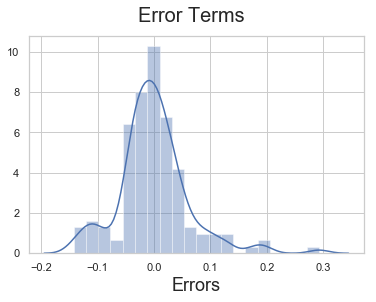

In [223]:
#Residual Analysis
y_train_price = model_11.predict(X_train_linear_model)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)           
plt.xlabel('Errors', fontsize = 18)

Text(0,0.5,'Car Price')

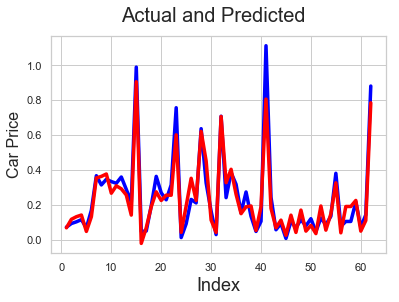

In [251]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")     #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)                  
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)

In [224]:
#Making Predictions

numerical_var = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_test[numerical_var] = scaler.transform(df_test[numerical_var])

D:\Anaconda_Setup\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda_Setup\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [225]:
y_test = df_test.pop('price')
X_test = df_test

In [228]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_1 = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_1 = sm.add_constant(X_test_1)

In [229]:
y_pred = linear_model.predict(X_test_1)

Text(0,0.5,'y_pred')

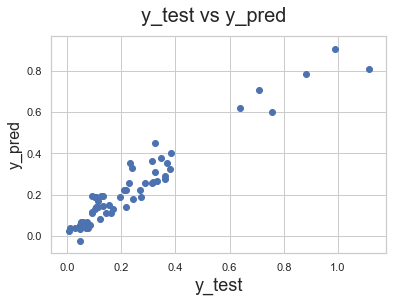

In [230]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [232]:
#To calculate the R-squared 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9126794364569675

In [250]:
#To calculate the R-squared 
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06831639620741776


# Conclusion

#### It can be concluded that all our variables in the range and the model is stable. Error terms are found to normally distributed. 
variables significant in predicting the price of a car are wheelbase, horsepower, cylindernumber_four, LuxuryCars and carbody_convertible.

<b> price = (0.3249 x wheelbase) + (0.4945 x horsepower) + (0.1835 x carbody_convertible) + (-0.0623 x cylindernumber_four) + (0.2580 x LuxuryCars) - 0.0163 </b>